## Importing all the necessary libraries

In [51]:
# -------------------- Data Analysis -------------------- #
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# -------------------- Preprocessing -------------------- #
from imblearn.over_sampling import RandomOverSampler, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

# -------------------- Model selection -------------------- #
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold
# from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# -------------------- All the ML models used -------------------- #
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# -------------------- Model evaluation -------------------- #
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score, fbeta_score, roc_curve, balanced_accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Open the dataset

In [52]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df
# df = Dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### There's a useless column - customerID. It's not useful at all in modelling, so it's dropped.

In [53]:
df.drop('customerID', inplace = True, axis = 1)

In [54]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Next, use info() and describe() methods

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### A problem with TotalCharges column

Total charges is expected to be a floating-point integer, but it's an object type here.

In [56]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
# errors kwarg is for empty values

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


TotalCharges has been successfully converted to a number.

Next, for convenice, convert the values of SeniorCitizen to object.

In [58]:
df['SeniorCitizen'].replace({0 : 'No', 1 : 'Yes'}, inplace = True)

Verify the conversion.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Statistical analysis of numeric features

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


#### A problem: tenure shouldn't be zero.

In [61]:
df['tenure'].replace({0 : np.nan}, inplace = True)

In [62]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              11
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Only 11 missing values out of ~7000, so these rows can be dropped.

In [63]:
df.dropna(inplace = True)

In [64]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [65]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### Analyse the target variable

In [66]:
df['Churn'].value_counts(normalize = True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

There's a slight class imbalance, which will be dealt with later.

# DATA VISUALISATION

## Univariate analysis

List all the columns first

In [67]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [68]:
cat = df.select_dtypes(include = 'object')      # Select all the categorical columns
cat

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


### For visualisation purposes

In [69]:
cat_col_names = cat.columns.tolist()
mid_index = len(cat_col_names) // 2
first_half = cat_col_names[: mid_index]
second_half = cat_col_names[mid_index :]

## For the first half of the list

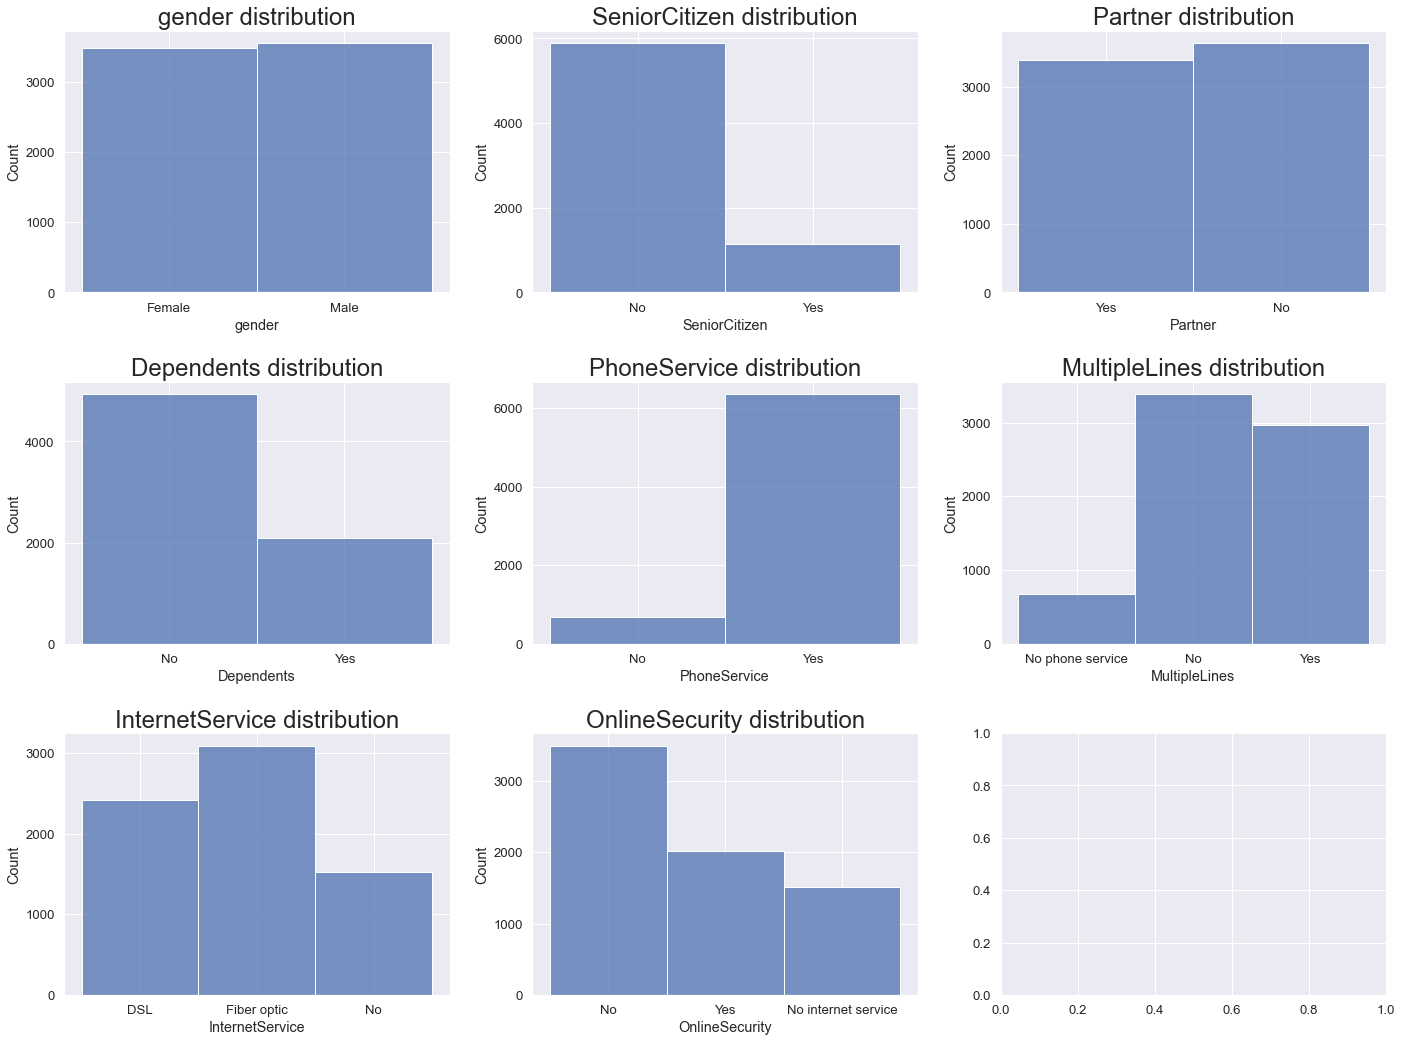

In [70]:
fig, axs = plt.subplots(3,3, figsize=(20, 15))
count = 1
for column in first_half:
    sns.set(font_scale = 2)
    plt.subplot(3, 3, count)
    plt.title(column + " distribution")
    sns.histplot(df, x = column)
    plt.tight_layout()
    count += 1
plt.show()

#### Inferences:

1. Number of males and females is approx. equal.
2. Most of the customers are not senior citizens.
3. Number of customers with and without a partner is approx. equal.
4. Most of the people are not dependents.
5. A vast majority have phone service.

### For the second half

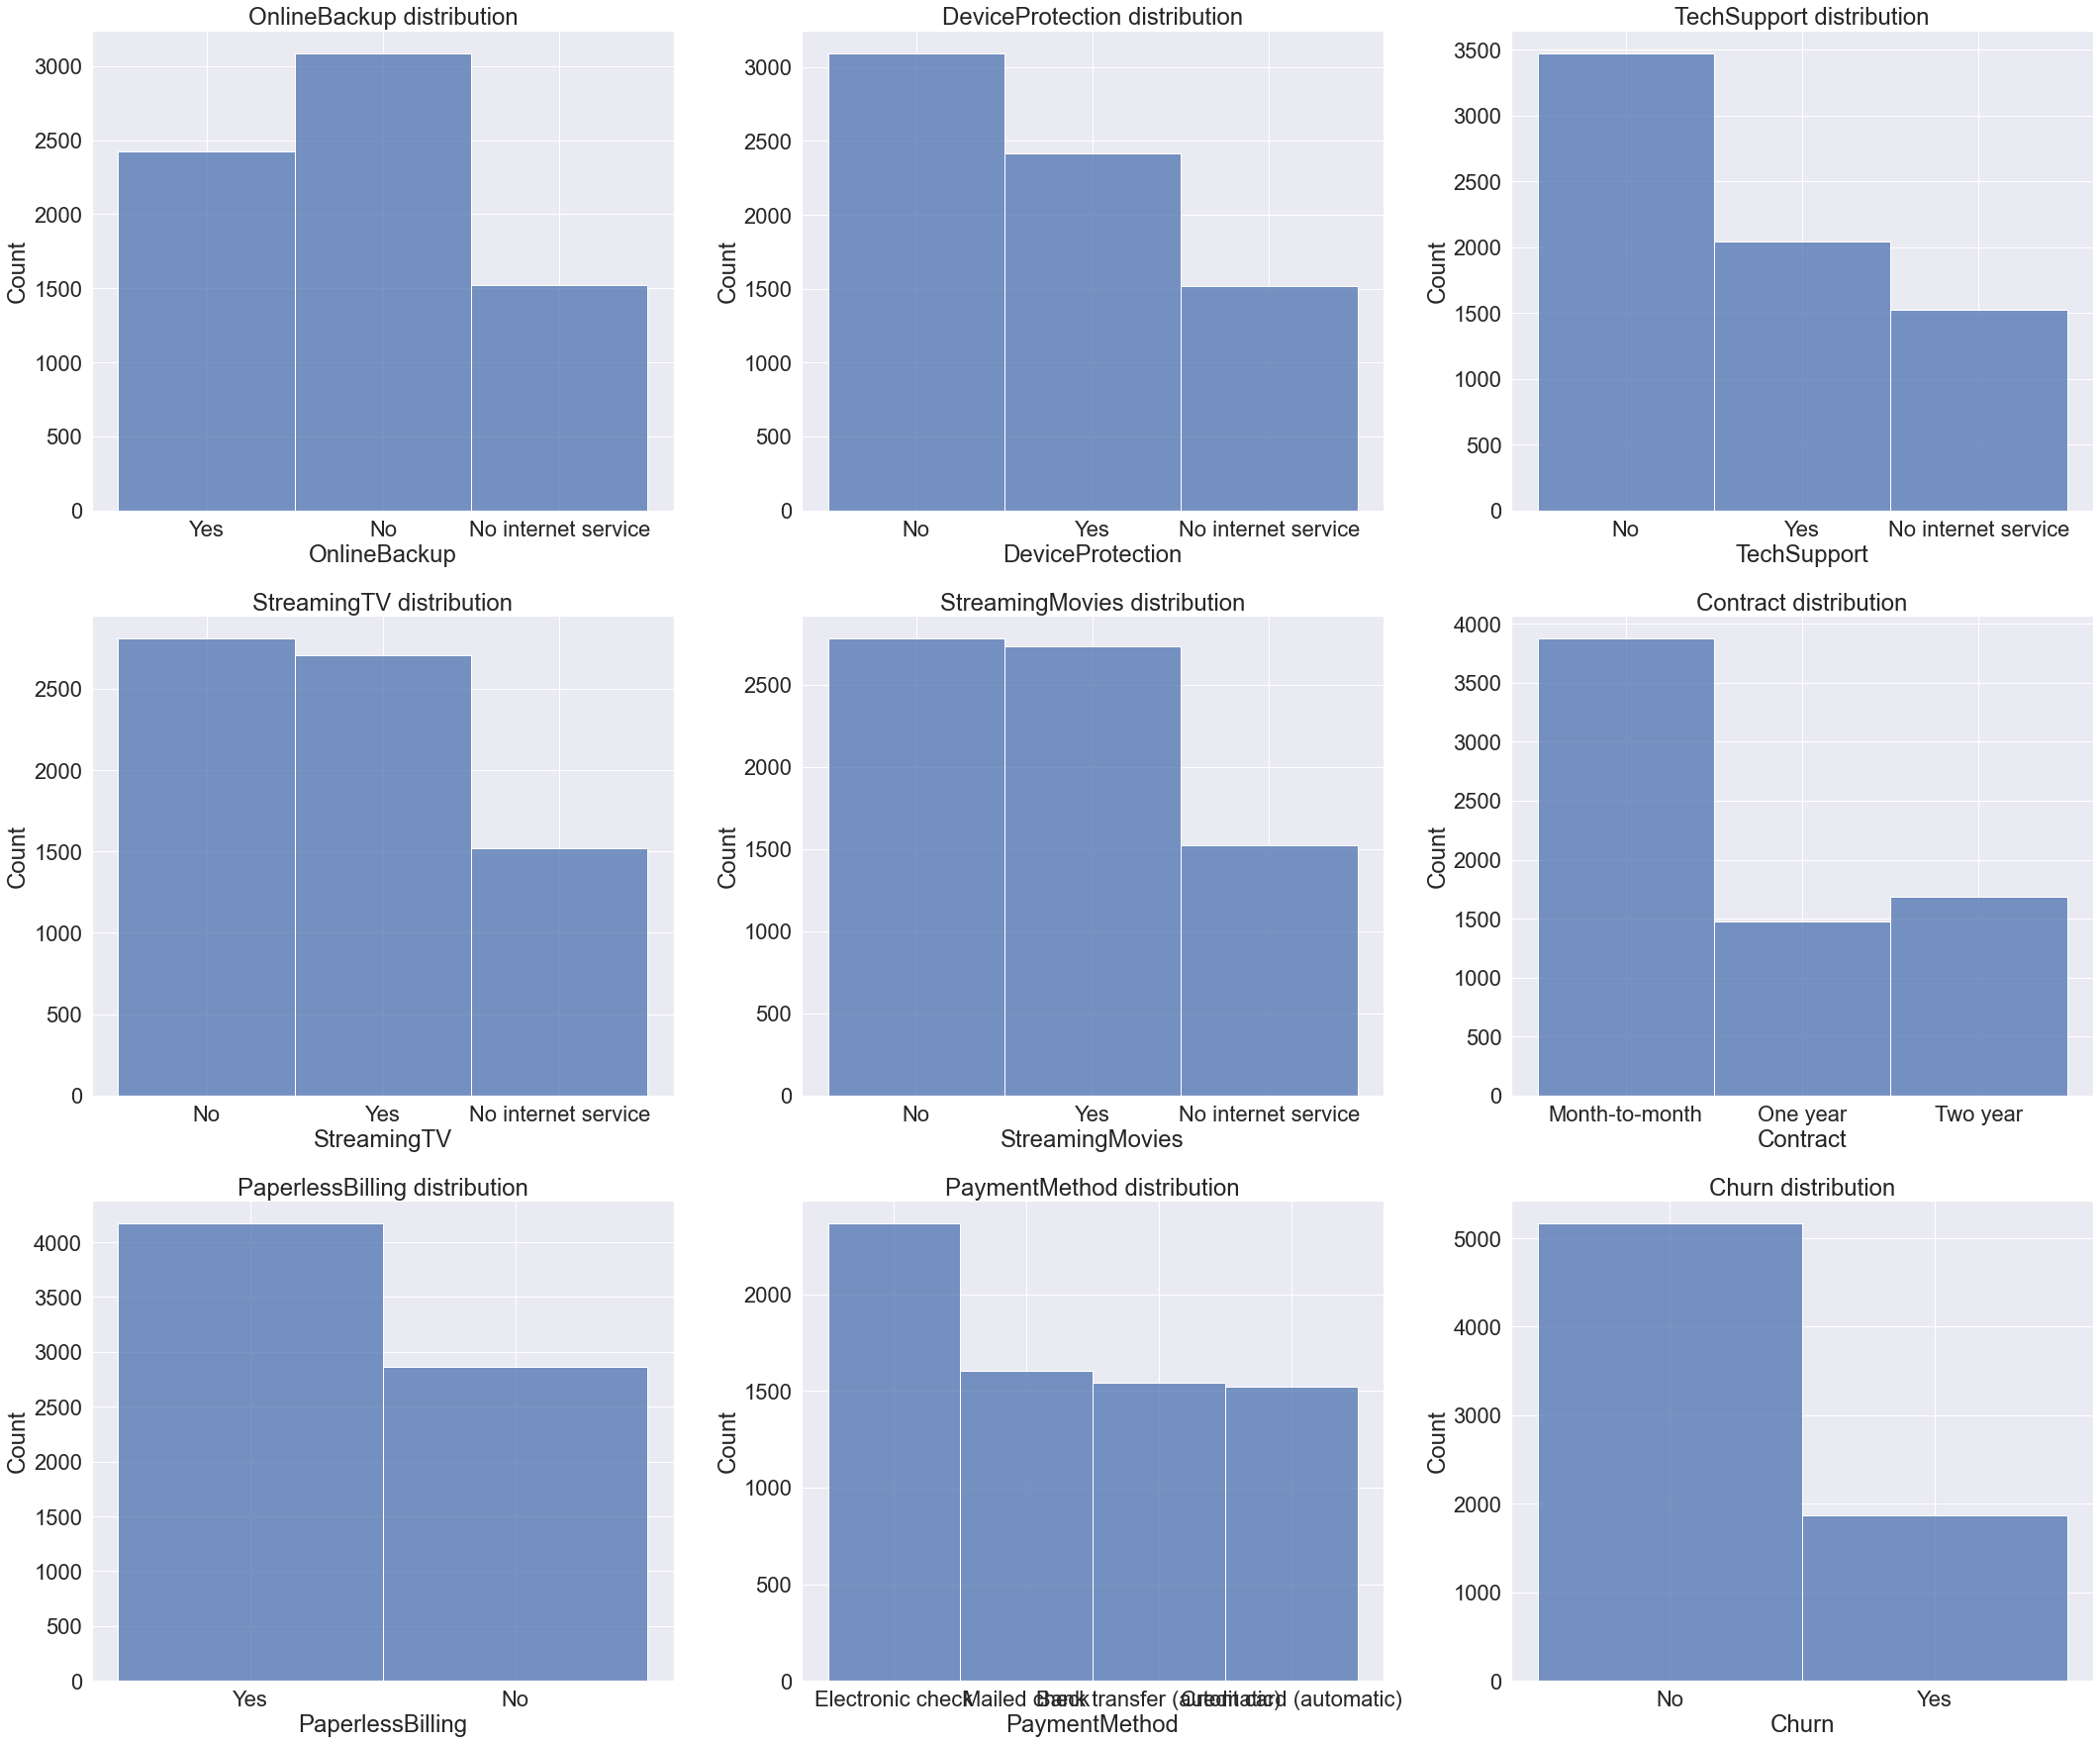

In [71]:
fig, axs = plt.subplots(3,3, figsize=(30, 25))
count = 1
for column in second_half:
    sns.set(font_scale = 2)
    plt.subplot(3, 3, count)
    plt.title(column + " distribution")
    sns.histplot(df, x = column)
    plt.tight_layout()
    count += 1
plt.show()

## Bivariate analysis

### Churn and tenure

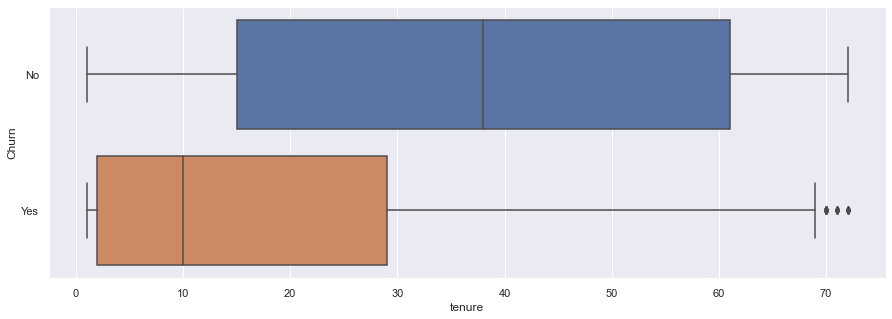

In [72]:
plt.figure(figsize = (15, 5))
sns.set(font_scale = 1)
sns.boxplot(data = df, y = 'Churn', x = 'tenure', orient = 'h')
plt.show()

#### Inference:

It can be observed that people who churn usually have a low value of tenure.

### Churn and TotalCharges

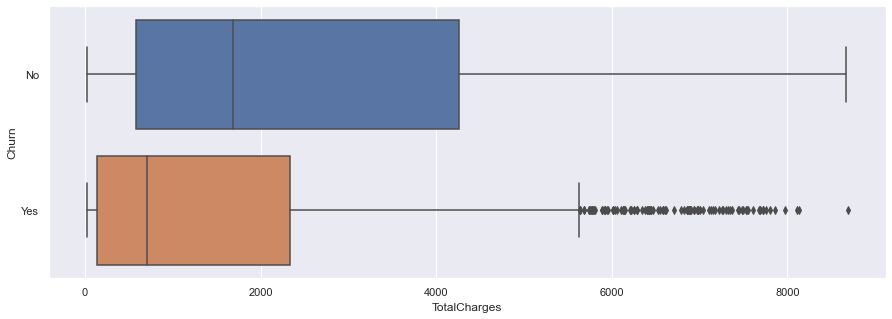

In [73]:
plt.figure(figsize = (15, 5))
sns.set(font_scale = 1)
sns.boxplot(data = df, y = 'Churn', x = 'TotalCharges', orient = "h")
plt.show()

### Churn and MonthlyCharges

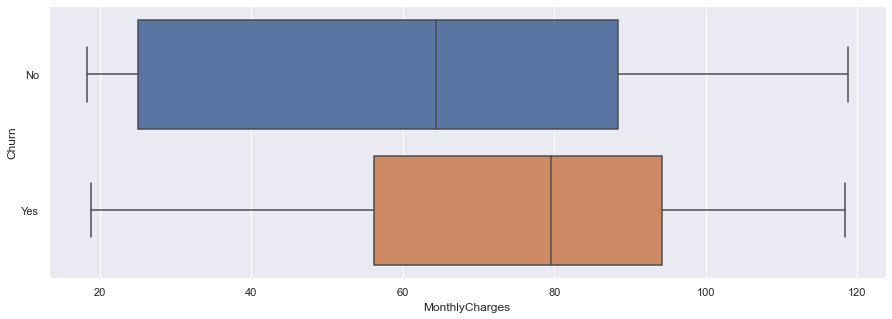

In [74]:
plt.figure(figsize = (15, 5))
sns.set(font_scale = 1)
sns.boxplot(data = df, y = 'Churn', x = 'MonthlyCharges', orient = "h")
plt.show()

Most of the people who churned had higher Monthly Charges

### Churn and Gender

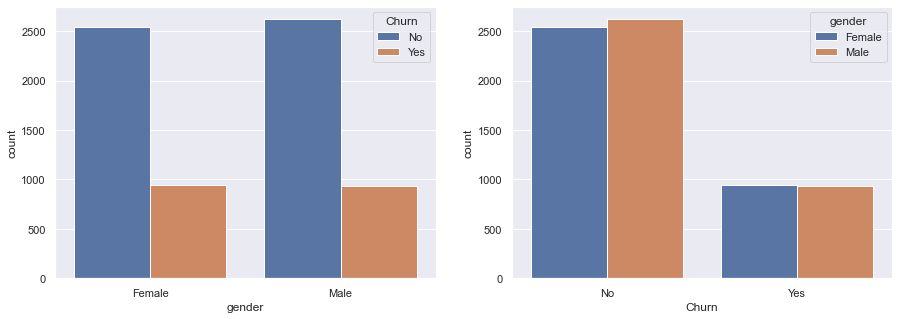

In [75]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'gender', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'gender', x = 'Churn')
plt.show()

#### Inference:
There doesn't seem to be a relation between gender and churn rate.

### Churn and SeniorCitizen

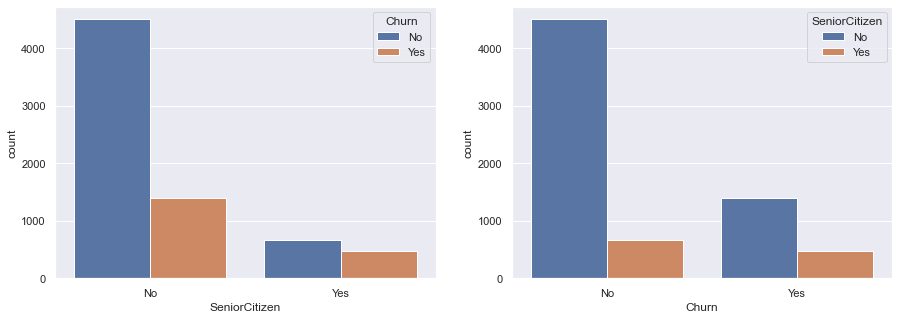

In [76]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'SeniorCitizen', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'SeniorCitizen', x = 'Churn')
plt.show()

#### Inferences:

1. People who are not senior citizens are less likely to churn than those who are.
2. Non-churners are likely to be of the younger age group.

### Churn and Partner

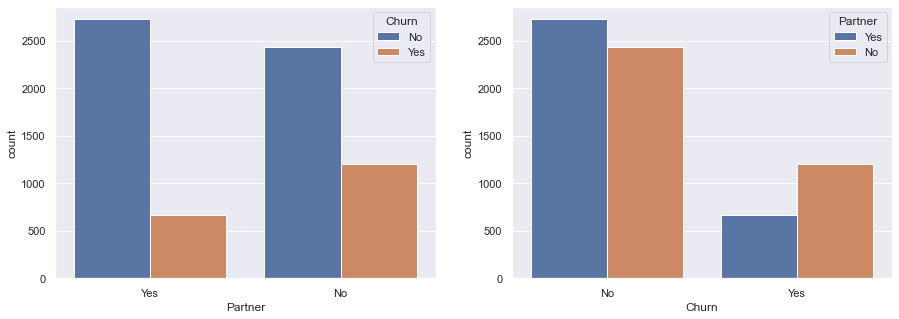

In [77]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'Partner', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'Partner', x = 'Churn')
plt.show()

#### Inferences:

1. People without a partner are comparatively more likely to churn than those with one.
2. Most churners do not have a partner.

### Churn and Dependents

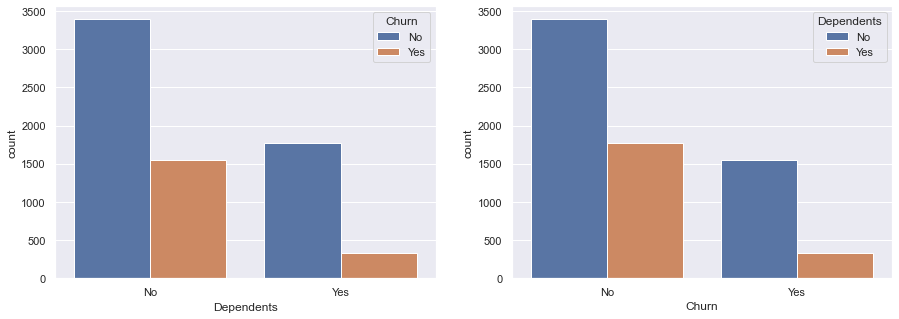

In [78]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'Dependents', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'Dependents', x = 'Churn')
plt.show()

#### Inferences:

1. Doesn't seem to be a clear relation between dependent people and churn.
2. Most churners are not dependent.

### Churn and MultipleLines

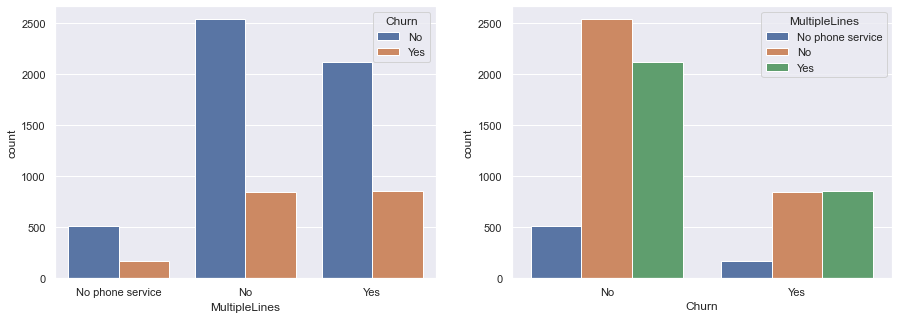

In [79]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'MultipleLines', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'MultipleLines', x = 'Churn')
plt.show()

#### Inferences:

Customers with multiple lines have a slightly higher churn rate.

### Churn and InternetService

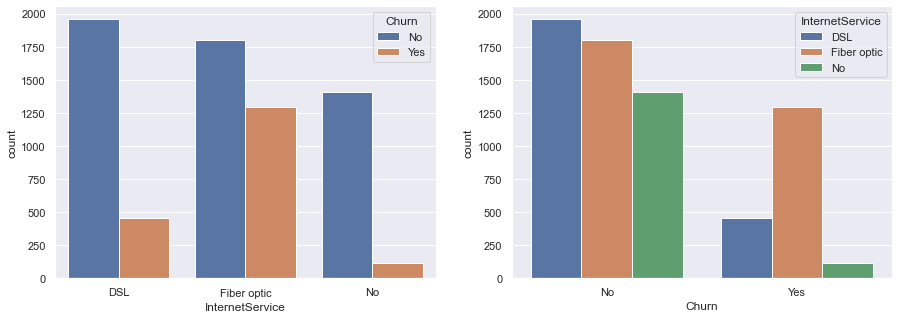

In [80]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'InternetService', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'InternetService', x = 'Churn')
plt.show()

#### Inferences:

1. Customers with fibre optic have a high churn rate.
2. Customers without internet have a very low churn rate.

### Additional Services

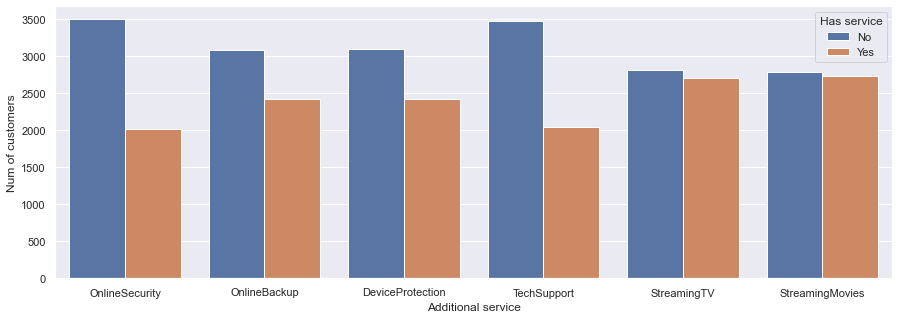

In [81]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

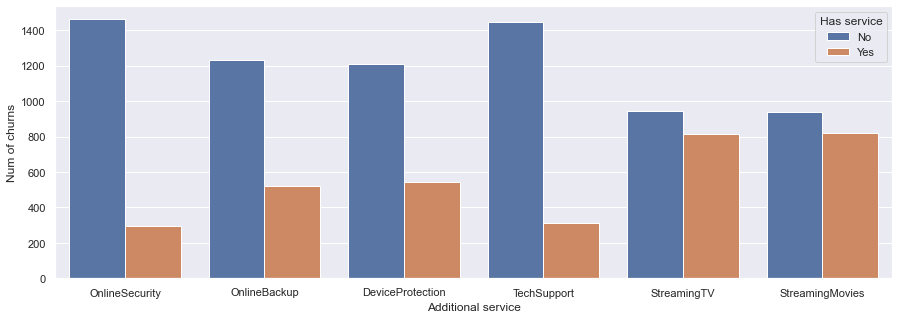

In [82]:
plt.figure(figsize=(15, 5))
df1 = df[(df['InternetService'] != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

#### Inferences:

Most customers WITHOUT the additional services (except Streaming TV and movies) have a low churn rate.

### Churn and Contract

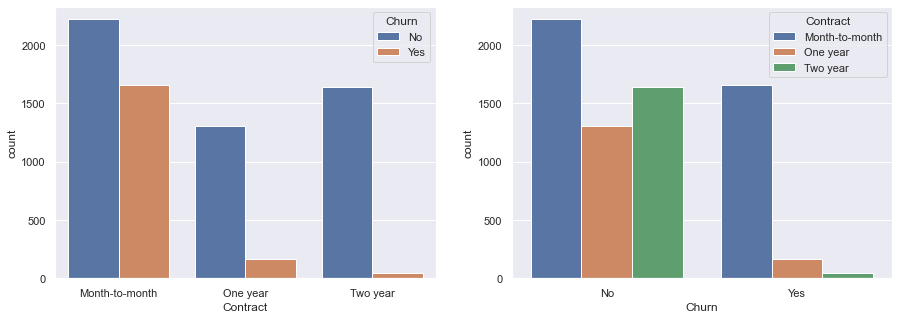

In [83]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'Contract', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'Contract', x = 'Churn')
plt.show()

#### Inferences:

1. Customers who have a one or two year contract have a very low churn rate.
2. Majority of the churners have a month-to-month contract.

### Churn and Payment

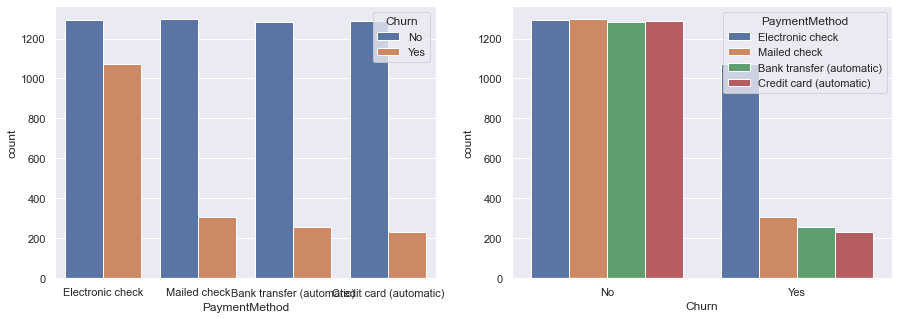

In [84]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'PaymentMethod', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'PaymentMethod', x = 'Churn')
plt.show()

#### Inferences:

1. Customers who pay via electronic cheque have a high churn rate.
2. Customers who pay via other methods have a significantly lower churn rate.
3. Majority of the churners pay via electronic cheque.
4. Most of the customers prefer to pay by electronic cheque.

### Paperless billing

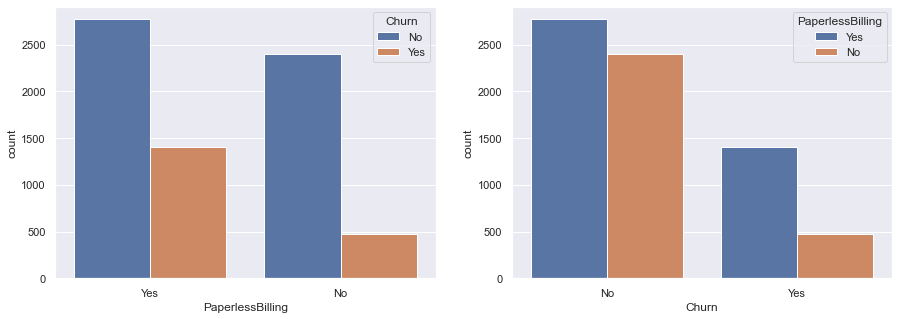

In [85]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'PaperlessBilling', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'PaperlessBilling', x = 'Churn')
plt.show()

#### Inferences:

1. Most customers pay via paper-less billing.
2. These customers however have a high churn rate.

### To be done: graphs for continuous features

#### (Visualisation ends here)

### Convert churn from object to number.

In [86]:
df['Churn'].replace({'Yes' : 1, 'No' : 0}, inplace = True)

## Heatmap between continous and categorical variables

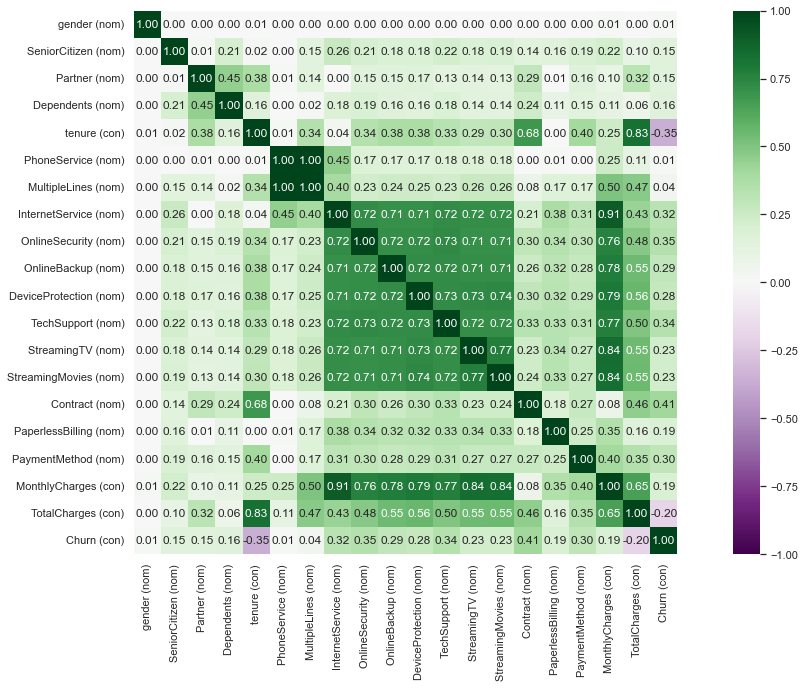

In [87]:
from dython import nominal
sns.set(font_scale = 1)
nominal.associations(df,figsize=(20,10),mark_columns=True, cmap = 'PRGn');

### Correlation between churn and numeric features.

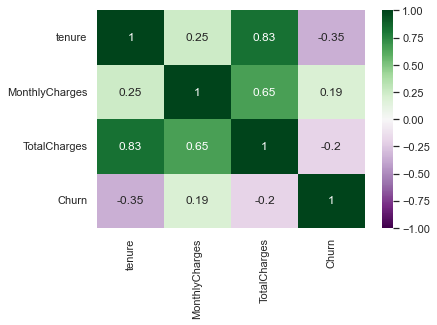

In [88]:
corr = df.corr()
sns.heatmap(corr, vmax = 1, vmin = -1, annot = True, cmap = 'PRGn')
plt.show()

## Heatmap with dummy variables.

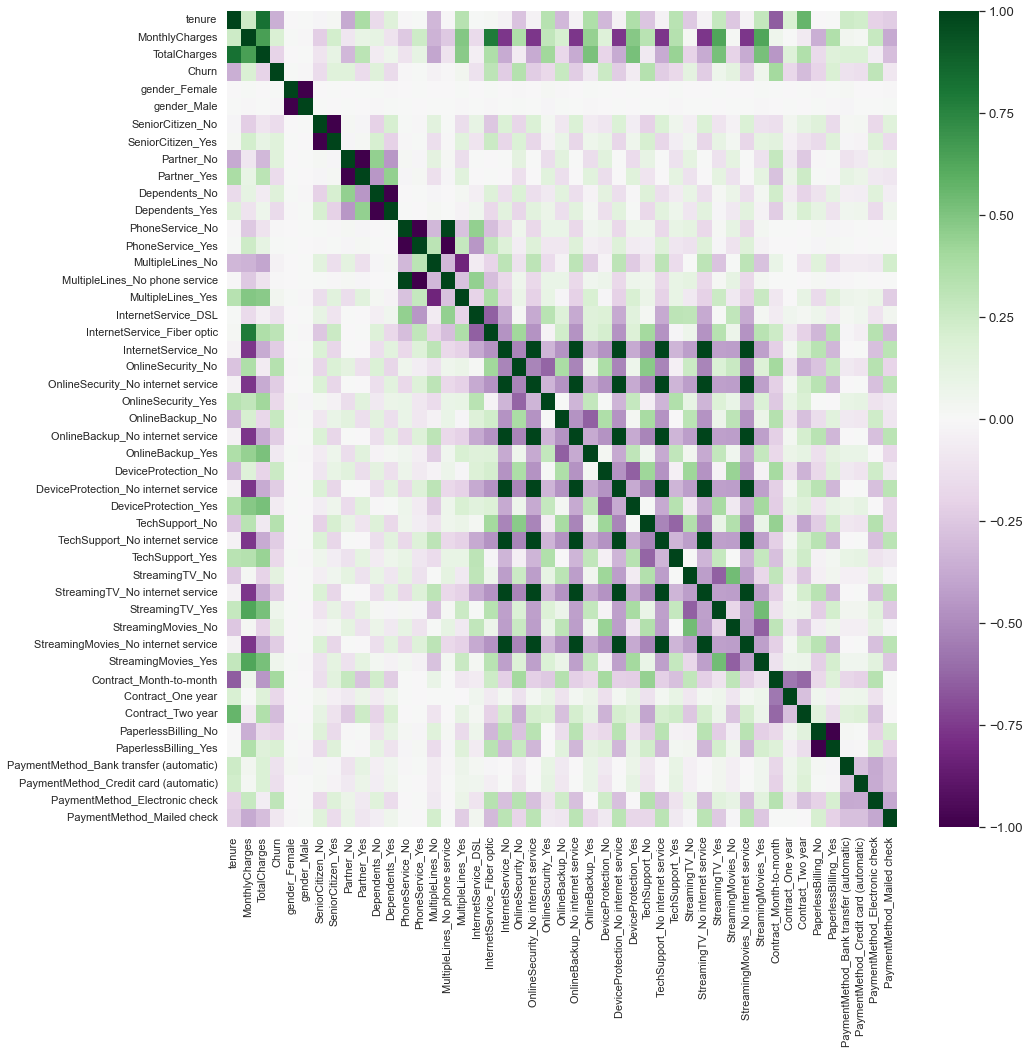

In [89]:
df_dummy = pd.get_dummies(df)
corr_dummy = df_dummy.corr()
fig, ax = plt.subplots(1, 1, figsize = (15, 15))
sns.set(font_scale = 1.2)
xticks = df.index
plt.xticks(rotation = 45)
map = sns.heatmap(corr_dummy, vmin = -1, vmax = 1, cmap = 'PRGn')
# map.set_xticklabels(map.get_xticklabels(), rotation = -60)
plt.show()

### There seems to be little relation between genders and other features, so it's dropped.

In [90]:
df.drop('gender', inplace = True, axis = 1)

TotalCharges is a bit suspicious since it is approx equal to tenure * monthlyCharges

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


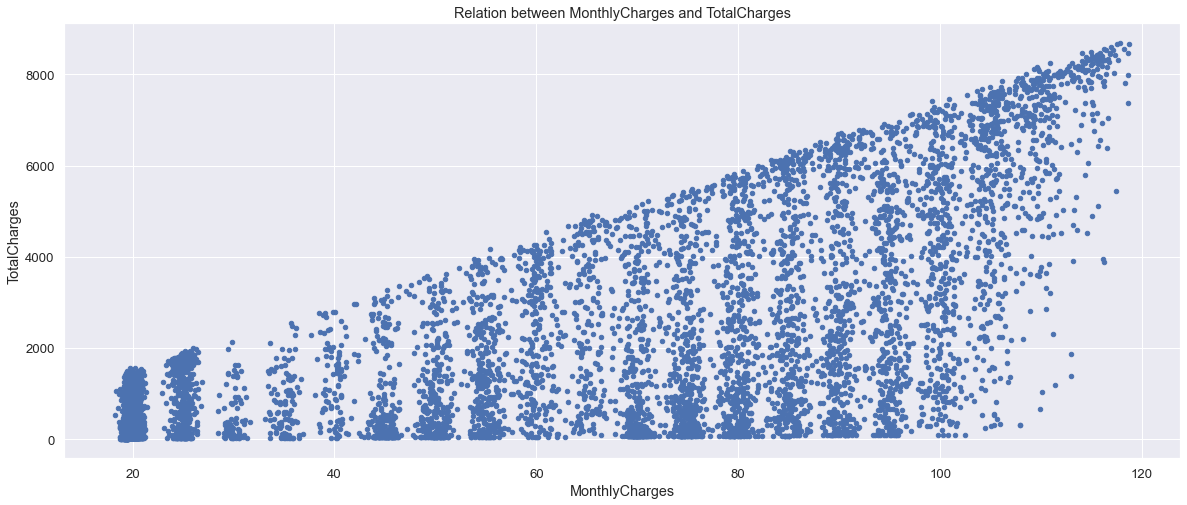

In [91]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(
    figsize = (20, 8), x = 'MonthlyCharges', y = 'TotalCharges'
)
plt.title('Relation between MonthlyCharges and TotalCharges')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


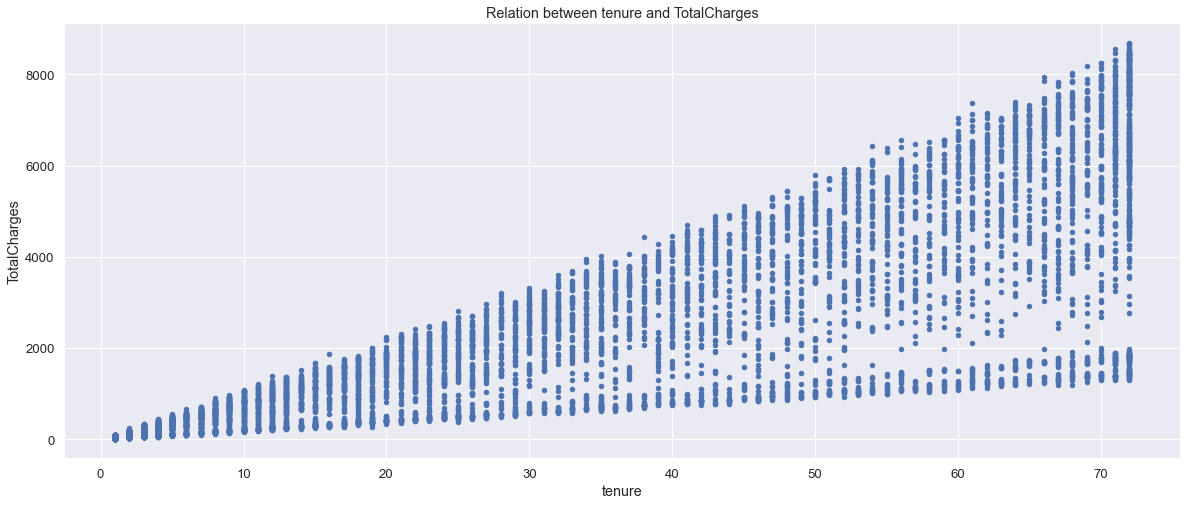

In [92]:
df[['tenure', 'TotalCharges']].plot.scatter(
    figsize = (20, 8), x = 'tenure', y = 'TotalCharges'
)
plt.title('Relation between tenure and TotalCharges')
plt.show()

Since monthly charges and total charges are collinear, the latter can be dropped.

In [93]:
df.drop('TotalCharges', axis = 1, inplace = True)

## Modelling

In [94]:
# Separate the features and the target. Then perfrom the train-test split

X = df.drop('Churn', axis = 1)
y = df.Churn

## Train-test split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    X , y, test_size = 0.33, stratify = y, random_state = 42
)
X_train_org = X_train
y_train_org = y_train

## Display counts of training values of y

In [96]:
y_train.value_counts(normalize = True)

0    0.734239
1    0.265761
Name: Churn, dtype: float64

## Create numerical and categorical pipelines + Over/Undersampling

In [97]:
# # First, separate the numerical and categorical variables.

# num_features = X_train.select_dtypes(exclude = 'object').columns.tolist()
# cat_features = X_train.select_dtypes(include = 'object').columns.tolist()

# # Then, create the pipelines and the Column Transformer.

# num_pipeline = Pipeline(steps = [
#     ('scaler', MinMaxScaler())
# ])

# cat_pipeline = Pipeline(steps = [
#     ('encoder', OneHotEncoder())
#     # ('encoder', OrdinalEncoder())
# ])

# processor = ColumnTransformer(transformers = [
#     ('numerical', num_pipeline, num_features),
#     ('categorical', cat_pipeline, cat_features)
# ])
ordinal_columns, onehot_columns = list(), list()

cat_features = X_train.select_dtypes(include = 'object').columns.tolist()
num_features = X_train.select_dtypes(exclude = 'object').columns.tolist()

# Onehot encode attributes which have more than two unique values.
for col in cat_features:
    unique_values = df[col].nunique()
    if unique_values == 2:
        ordinal_columns.append(col)
    else:
        onehot_columns.append(col)

num_pipeline = Pipeline(steps = [
    ('scaler', MinMaxScaler())
])

onehot_pipeline = Pipeline(steps = [
    ('encoder', OneHotEncoder())
])

ordinal_pipeline = Pipeline(steps = [
    ('encoder', OrdinalEncoder())
])

processor = ColumnTransformer(transformers = [
    ('numerical', num_pipeline, num_features),
    ('onehot', onehot_pipeline, onehot_columns),



    
    ('ordinal', ordinal_pipeline, ordinal_columns)
])

cat_indices = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
sm = SMOTENC(cat_indices)
over = RandomOverSampler(sampling_strategy = 0.9)
under = RandomUnderSampler(sampling_strategy=0.999)

from imblearn.pipeline import Pipeline as Pipe

pipeline = Pipe(steps = [
    ('over', over),
    ('under', under)
    # ('SMOTE', sm)
])

X_train, y_train = pipeline.fit_resample(X_train_org, y_train_org)

In [98]:
# View class counts after over/undersampling

y_train.value_counts()

0    3116
1    3113
Name: Churn, dtype: int64

In [99]:
models = list()
models.append(('LR', LogisticRegression(class_weight='balanced')))
models.append(('SGD', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier(verbosity = 0)))

## Cross validate

In [100]:
names, results = list(), list()
metrics = ['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1', 'roc_auc']
acc_score, b_acc_score, prec_score, reca_score, f1_scores, roc_score = list(), list(), list(), list(), list(), list()

for name, model in models:
    pipeline = Pipeline(steps = [
        ('processor', processor),
        (name, model)
    ])
    kfold = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 5, random_state = 314)
    scores = cross_validate(pipeline, X, y, scoring = metrics, cv = kfold)
    accuracy = scores['test_accuracy']
    bal_accuracy = scores['test_balanced_accuracy']
    precision = scores['test_precision']
    recall = scores['test_recall']
    f1 = scores['test_f1']
    roc = scores['test_roc_auc']
    acc_score.append(accuracy)
    b_acc_score.append(bal_accuracy)
    prec_score.append(precision)
    reca_score.append(recall)
    f1_scores.append(f1)
    roc_score.append(roc)
    names.append(name)

    # pd.set_option('precision', 6)
    print(f'For {name}:')
    print(f'Accuracy = {accuracy.mean():.6f} ({accuracy.std():.6f})')
    print(f'Balanced accuracy = {bal_accuracy.mean():.6f} ({bal_accuracy.std():.6f})')
    print(f'Precision = {precision.mean():.6f} ({precision.std():.6f})')
    print(f'Recall = {recall.mean():.6f} ({recall.std():.6f})')
    print(f'F1 = {f1.mean():.6f} ({f1.std():.6f})')
    print(f'ROC_AUC = {roc.mean():.6f} ({roc.std():.6f})\n')

For LR:
Accuracy = 0.748833 (0.016441)
Balanced accuracy = 0.763243 (0.017550)
Precision = 0.518439 (0.020949)
Recall = 0.794002 (0.028864)
F1 = 0.627038 (0.020817)
ROC_AUC = 0.843541 (0.017285)

For SGD:
Accuracy = 0.783305 (0.022736)
Balanced accuracy = 0.698459 (0.054369)
Precision = 0.637153 (0.077079)
Recall = 0.517298 (0.166245)
F1 = 0.543381 (0.104120)
ROC_AUC = 0.831953 (0.018730)

For KNN:
Accuracy = 0.757932 (0.015493)
Balanced accuracy = 0.674503 (0.021510)
Precision = 0.549644 (0.032980)
Recall = 0.496398 (0.039770)
F1 = 0.521161 (0.033413)
ROC_AUC = 0.769862 (0.019780)

For CART:
Accuracy = 0.726333 (0.016959)
Balanced accuracy = 0.653839 (0.020957)
Precision = 0.486114 (0.031038)
Recall = 0.499079 (0.037282)
F1 = 0.492045 (0.030636)
ROC_AUC = 0.655848 (0.021193)

For GNB:
Accuracy = 0.688225 (0.015266)
Balanced accuracy = 0.739995 (0.015862)
Precision = 0.454083 (0.014441)
Recall = 0.850507 (0.027389)
F1 = 0.591911 (0.016412)
ROC_AUC = 0.818401 (0.017441)

For SVM:
Accura

## Function to plot results

In [101]:
def boxplot(metric, scores):
    fig = plt.figure(figsize = (20, 8))
    fig.suptitle(f'Algorithm Comparison ({metric})')
    ax = fig.add_subplot(111)
    plt.boxplot(scores, labels = names, showmeans = True)
    ax.set_xticklabels(names)
    plt.show()

### Accuracy plot

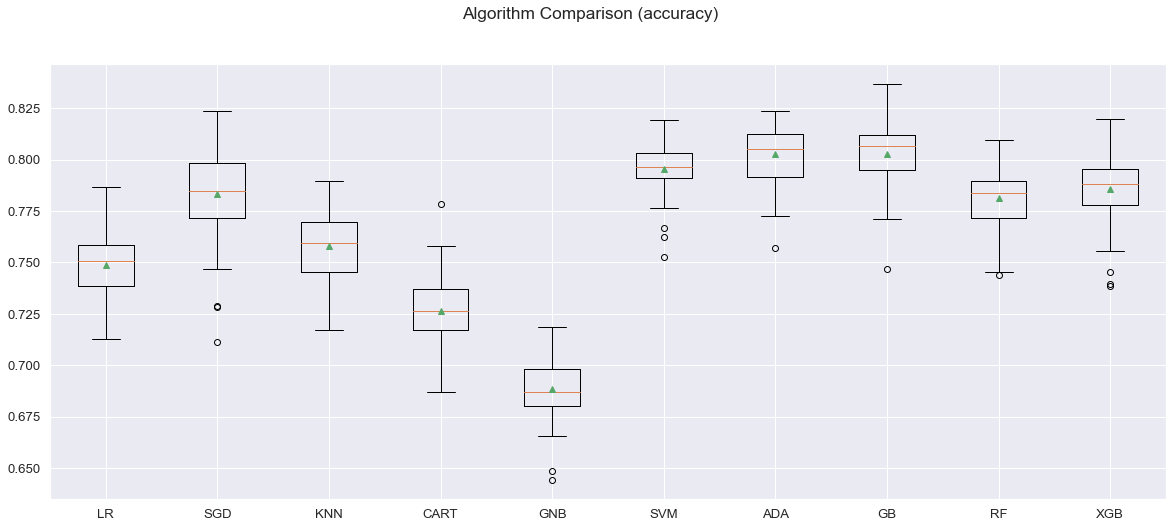

In [102]:
boxplot('accuracy', acc_score)

### Precision plot

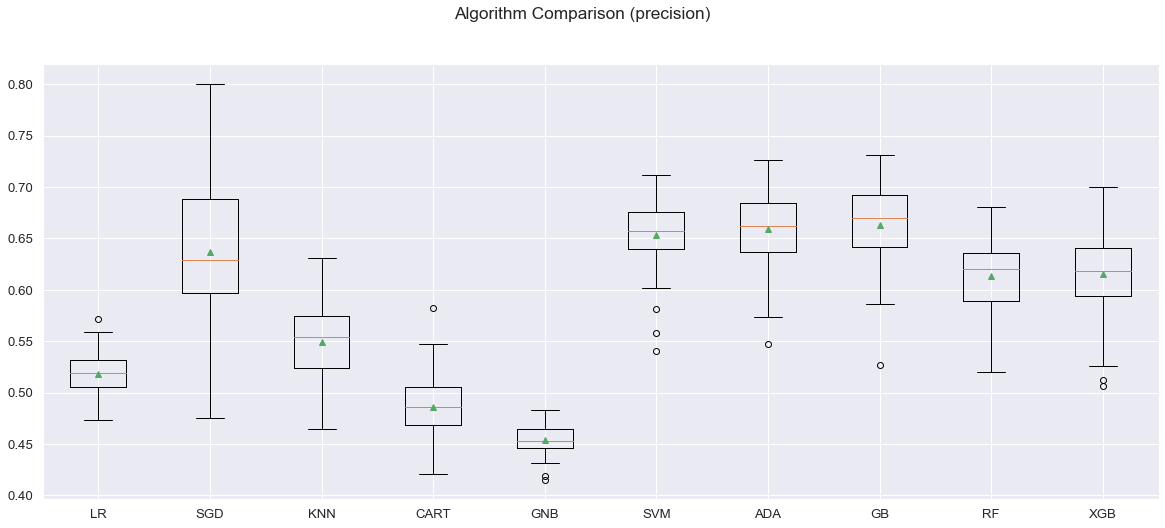

In [103]:
boxplot('precision', prec_score)

### Recall plot

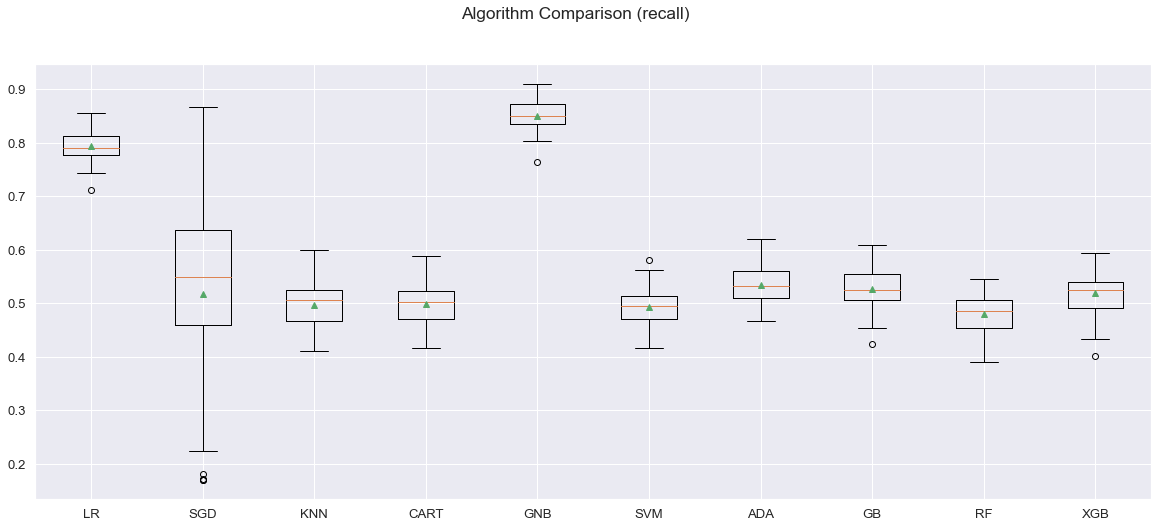

In [104]:
boxplot('recall', reca_score)

### F1 plot

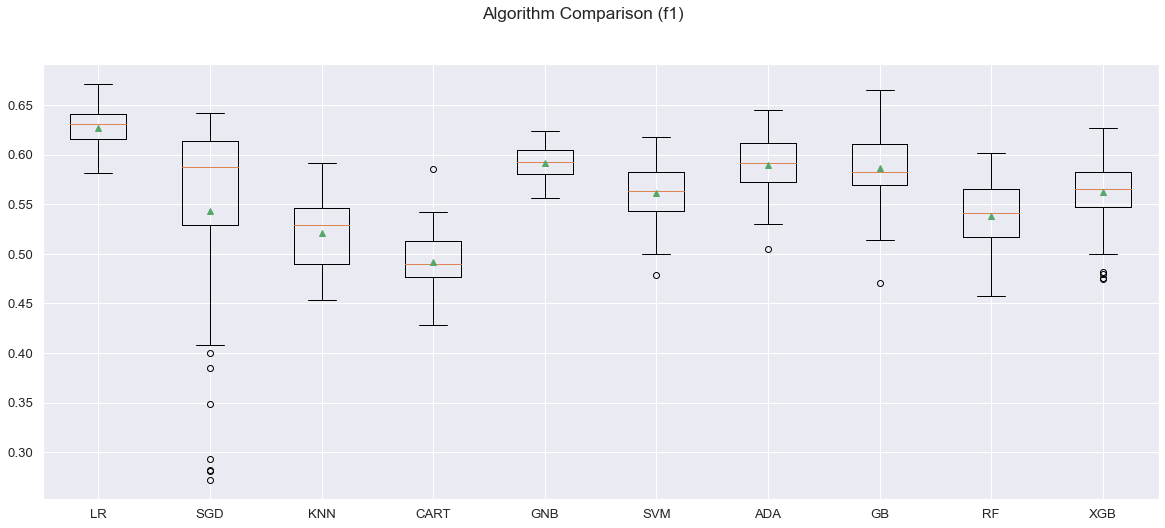

In [105]:
boxplot('f1', f1_scores)

## ROC Plot

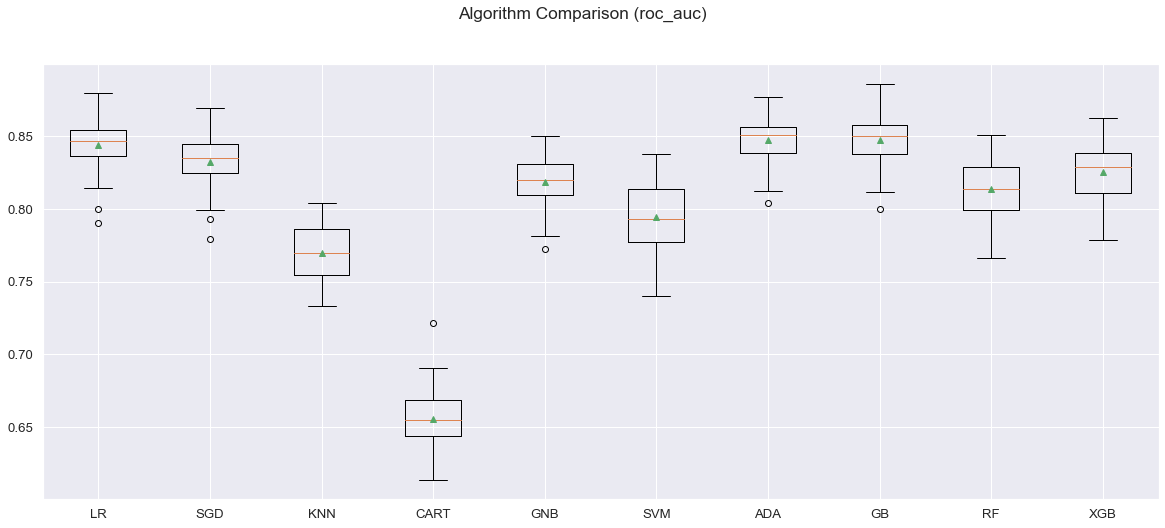

In [106]:
boxplot('roc_auc', roc_score)

## Balanced accuracy plot

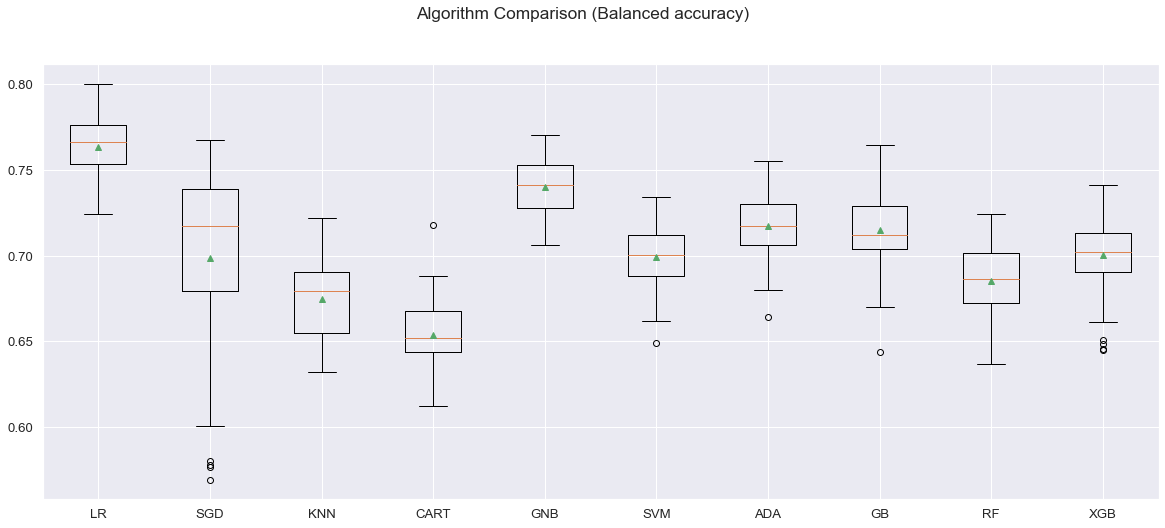

In [107]:
boxplot('Balanced accuracy', b_acc_score)

### Conclusions from plots:

Since this is an imbalanced dataset, accuracy is of less importance. More emphasis on balanced accuracy, recall, F1 score. Logistic regression is the clear winner here.

### Evaluate each model on testing dataset

In [108]:
scores_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'F2', 'ROC_AUC'])
index = 0

for name, model in models:
    pipe = Pipeline(steps = [
        #('processor', processor),
        #('selector', SelectKBest(mutual_info_classif, k = 15)),
        ('processor', processor),
        # ('selector', SelectKBest(mutual_info_classif, k = 20)),
        (name, model)
    ])

    _ = pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)

    print("\n",name, "trained!")
    f1 = f1_score(y_test, predictions)
    # print("F1:", f1)
    precision = precision_score(y_test, predictions)
    # print("Precision:", precision)
    recall = recall_score(y_test, predictions)
    # print("Recall:", recall)
    accuracy = accuracy_score(y_test, predictions)
    # print("Accuracy:", accuracy)
    roc = roc_auc_score(y_test, predictions)
    # print("ROC_AUC", roc)
    f2 = fbeta_score(y_test, predictions, beta = 2)
    # print(f2)

    model_results = pd.DataFrame([[name, accuracy, precision, recall, f1, f2, roc]],
        # columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']
    )

    scores_df.loc[index] = [name, accuracy, precision, recall, f1, f2, roc]
    index += 1

    # scores_df.append(model_results, ignore_index = True)
    # scores_df = pd.concat([scores_df, model_results], ignore_index = True)

    # print(classification_report(y_test, predictions))


 LR trained!

 SGD trained!

 KNN trained!

 CART trained!

 GNB trained!

 SVM trained!

 ADA trained!

 GB trained!

 RF trained!

 XGB trained!


In [109]:
scores_df

,Model,Accuracy,Precision,Recall,F1,F2,ROC_AUC
0,LR,0.741060,0.508264,0.797407,0.620820,0.715949,0.759032
1,SGD,0.758294,0.532558,0.742301,0.620176,0.688101,0.753193
2,KNN,0.686342,0.446273,0.747164,0.558788,0.658383,0.705741
3,CART,0.724688,0.483533,0.523501,0.502724,0.514987,0.660518
4,GNB,0.664369,0.434253,0.867099,0.578691,0.722973,0.729031
5,SVM,0.725549,0.489817,0.779579,0.601626,0.697101,0.742782
6,ADA,0.740629,0.507583,0.813614,0.625156,0.726063,0.763908
7,GB,0.745368,0.513430,0.805511,0.627129,0.723225,0.764551
8,RF,0.763464,0.552469,0.580227,0.566008,0.574454,0.705020
9,XGB,0.758725,0.536965,0.670989,0.596542,0.639086,0.730741


In [110]:
results = scores_df.sort_values(["F1", "Recall", "Precision"], ascending = False)
# results = scores_df.sort_values(['F2', 'Precision', 'Recall'], ascending = False)
results

,Model,Accuracy,Precision,Recall,F1,F2,ROC_AUC
7,GB,0.745368,0.513430,0.805511,0.627129,0.723225,0.764551
6,ADA,0.740629,0.507583,0.813614,0.625156,0.726063,0.763908
0,LR,0.741060,0.508264,0.797407,0.620820,0.715949,0.759032
1,SGD,0.758294,0.532558,0.742301,0.620176,0.688101,0.753193
5,SVM,0.725549,0.489817,0.779579,0.601626,0.697101,0.742782
9,XGB,0.758725,0.536965,0.670989,0.596542,0.639086,0.730741
4,GNB,0.664369,0.434253,0.867099,0.578691,0.722973,0.729031
8,RF,0.763464,0.552469,0.580227,0.566008,0.574454,0.705020
2,KNN,0.686342,0.446273,0.747164,0.558788,0.658383,0.705741
3,CART,0.724688,0.483533,0.523501,0.502724,0.514987,0.660518


### Re-examining KNN (likely needs to be redone)

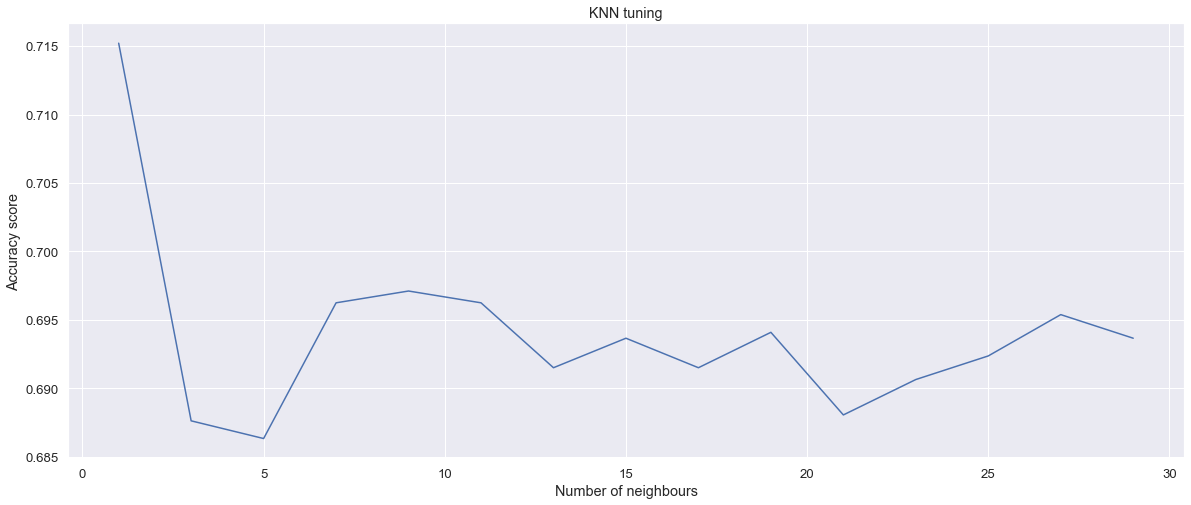

In [111]:
KNN_results = list()

for n in range(1, 31, 2):
    pipe = Pipeline(steps = [
            ('processor', processor),
            ('KNN', KNeighborsClassifier(n_neighbors = n))
    ])
    _ = pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    # KNN_results.append(accuracy)
    KNN_results.append(pipe.score(X_test, y_test))

fig = plt.figure(figsize = (20, 8))
plt.title('KNN tuning')
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy score')
plt.plot(range(1, 31, 2), KNN_results)
plt.show()

In [112]:
max_value = max(KNN_results)
max_index = KNN_results.index(max_value)
n_list = list(range(1, 31, 2))
best_n = n_list[max_index]
best_n

1

So, the optimal number of neighbours is (x). (value changes due to randomness of train_test_split)

### Re-examining RF (likely needs to be redone as well)

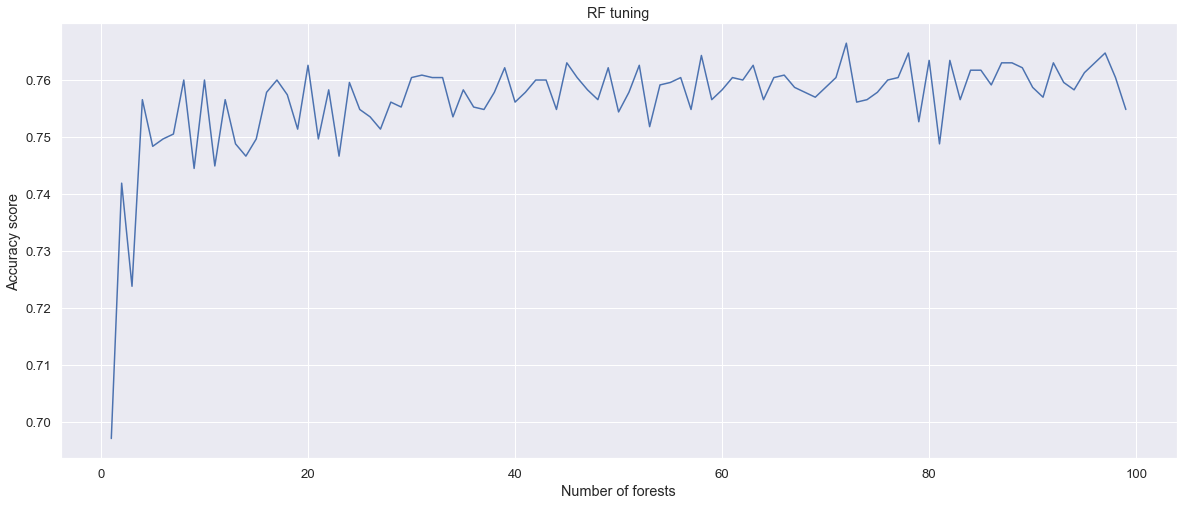

In [113]:
RF_results = list()

for n in range(1, 100, 1):
    pipe = Pipeline(steps = [
            ('processor', processor),
            ('RF', RandomForestClassifier(n_estimators = n))
    ])
    _ = pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    # KNN_results.append(accuracy)
    RF_results.append(pipe.score(X_test, y_test))

fig = plt.figure(figsize = (20, 8))
plt.title('RF tuning')
plt.xlabel('Number of forests')
plt.ylabel('Accuracy score')
plt.plot(range(1, 100, 1), RF_results)
plt.show()

In [114]:
max_value = max(RF_results)
max_index = RF_results.index(max_value)
n_list = list(range(1, 100))
RF_best_n = n_list[max_index]
RF_best_n

72

So, best value of n_estimators is (x).

### Re-fitting KNN and RF

In [115]:
KNN_pipe = Pipeline(steps = [
    ('processor', processor),
    ('KNN', KNeighborsClassifier(n_neighbors = 13))
])
_ = KNN_pipe.fit(X_train, y_train)
predictions = KNN_pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
F1 = f1_score(y_test, predictions)
roc = roc_auc_score(y_test, predictions)

print("FOR KNN")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", F1)
print("ROC_AUC:", roc)

RF_pipe = Pipeline(steps = [
    ('processor', processor),
    ('RF', RandomForestClassifier(n_estimators = RF_best_n))
])
_ = RF_pipe.fit(X_train, y_train)
predictions = RF_pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
F1 = f1_score(y_test, predictions)
roc = roc_auc_score(y_test, predictions)

print("\nFOR RF")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", F1)
print("ROC_AUC:", roc)

FOR KNN
Accuracy: 0.6915122791900044
Precision: 0.4541241890639481
Recall: 0.7941653160453809
F1: 0.5778301886792453
ROC_AUC: 0.7242540195250378

FOR RF
Accuracy: 0.7608789314950453
Precision: 0.546969696969697
Recall: 0.5850891410048622
F1: 0.5653876272513704
ROC_AUC: 0.7048098287183936


# Taking a closer look at some of the models

## 1. Logistic Regression

0.7410598879793192


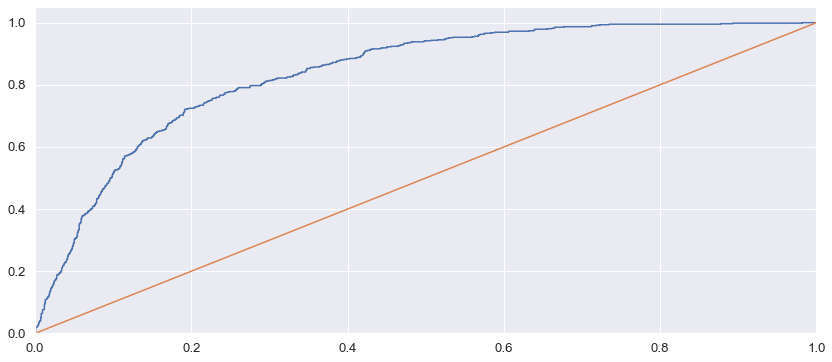

In [116]:
LR_clf = Pipeline(steps = [
    ('processor', processor),
    ('LR', LogisticRegression())
])
LR_clf.fit(X_train, y_train)
y_pred = LR_clf.predict(X_test)
probs = LR_clf.predict_proba(X_test)
probs = probs[:, 1]
clf_roc_auc = accuracy_score(y_test, y_pred)

rf_fpr, rf_tpr, _ = roc_curve(y_test, probs)

plt.figure(figsize = (14, 6))

plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % clf_roc_auc)
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

print(clf_roc_auc)
plt.show()


### Tuning Hyperparameters of Logisitc Regression

In [117]:
tuned_clf_df = pd.DataFrame(columns = ['Model', 'Parameters', 'Accuracy', 'Precision', 'Recall', 'F1', 'F2', 'ROC'])

In [118]:
solvers = ['liblinear', 'newton-cg', 'lbfgs']
c_values = [10, 1, 0.1, 100, 0.01]

parameters = dict(LR__C = c_values, LR__solver = solvers)

kfold = StratifiedKFold(n_splits = 10)
grid_search = GridSearchCV(
    estimator = LR_clf, param_grid = parameters, cv = kfold, scoring = 'balanced_accuracy'
)
grid_result = grid_search.fit(X_train, y_train)

LR_best_acc = grid_result.best_score_
LR_best_parameters = grid_result.best_params_

print(LR_best_acc)
print(LR_best_parameters)

0.7660977821749526
{'LR__C': 1, 'LR__solver': 'liblinear'}


#### Check accuracy with updated parameters.

In [119]:
LR_clf = Pipeline(steps = [
    ('processor', processor),
    ('LR', LogisticRegression(C = 1, solver = 'liblinear'))
])
LR_clf.fit(X_train, y_train)
y_pred = LR_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
parameters = "C = 1, solver = liblinear"
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
F2 = fbeta_score(y_test, y_pred, beta = 2)
roc = roc_auc_score(y_test, y_pred)

tuned_clf_df.loc[0] = ['LR', parameters, accuracy, precision, recall, F1, F2, roc]

tuned_clf_df

,Model,Parameters,Accuracy,Precision,Recall,F1,F2,ROC
0,LR,"C = 10, solver = newton-cg",0.740198,0.507216,0.797407,0.620038,0.715532,0.758445


## 2. Support Vector Machine

0.7255493321844033


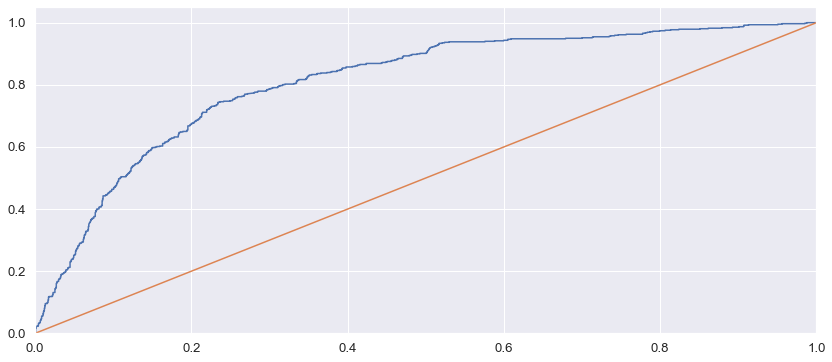

In [120]:
SVC_clf = Pipeline(steps = [
    ('processor', processor),
    ('SVC', SVC(probability = True))
])
SVC_clf.fit(X_train, y_train)
y_pred = SVC_clf.predict(X_test)
probs = SVC_clf.predict_proba(X_test)
probs = probs[:, 1]
clf_roc_auc = accuracy_score(y_test, y_pred)

rf_fpr, rf_tpr, _ = roc_curve(y_test, probs)

plt.figure(figsize = (14, 6))

plt.plot(rf_fpr, rf_tpr, label='SVM (area = %0.2f)' % clf_roc_auc)
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

print(clf_roc_auc)
plt.show()


### Tuning hyperparameters (takes too long)

In [121]:
# kernels = ['linear', 'rbf', 'poly']
# c_values = [10, 1, 0.1, 100]

# parameters = dict(SVC__C = c_values, SVC__kernel = kernels)

# kfold = StratifiedKFold(n_splits = 10)
# grid_search = RandomizedSearchCV(SVC_clf, parameters, scoring = 'balanced_accuracy')
# grid_result = grid_search.fit(X_train, y_train)

# SVC_best_acc = grid_result.best_score_
# SVC_best_parameters = grid_result.best_params_

# print(SVC_best_acc)
# print(SVC_best_parameters)

#### To be done: tune hyperparameters of some other models

### 'Finalise' the model (preliminary)

In [122]:
final_model = Pipeline(steps = [
        ('processor', processor),
        # ('selector', SelectKBest(mutual_info_classif, k = 30)),
        # ('XGB', XGBClassifier(booster = 'gbtree'))
        # ('RF', RandomForestClassifier(n_estimators = RF_best_n))
        ('LR', LogisticRegression(C = 10, solver = 'newton-cg'))
        # ('KNN', KNeighborsClassifier(n_neighbors = 7))
        # ('LR', LogisticRegression())
])
_ = final_model.fit(X_train, y_train)
predictions = final_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(accuracy)
print(balanced_accuracy_score(y_test, predictions))
print(recall)

0.7401981904351572
0.7584451876031989
0.7974068071312804


In [123]:
dummy_pred = [0 for _ in range(2321)]
dum_bal_acc = balanced_accuracy_score(y_test, dummy_pred)
print(dum_bal_acc)

0.5


In [124]:
len(predictions)

2321

### Making a random prediction

In [125]:
df.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,No,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,No,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0
2,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
3,No,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0
4,No,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1


In [126]:
tenure = 2
month_charge = 20
test = ['Yes', 'Yes', 'Yes', tenure, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', month_charge]
dummy = pd.DataFrame([test], columns = df.drop('Churn', axis = 1).columns)

predicted_class = final_model.predict(dummy)[0]             # The actual predicted class
print(predicted_class)
probabilties = final_model.predict_proba(dummy)             # The probabilities
probabilties

1


array([[0.00615448, 0.99384552]])

In [127]:
predicted = final_model.predict_proba(dummy)
predicted

array([[0.00615448, 0.99384552]])

### Feature importances (to be done later)

In [128]:
# onehot_columns = list(final_model.named_steps['processor'].named_transformers_['categorical'].named_steps['encoder'].get_feature_names(input_features=cat_features))

In [129]:
# numeric_features_list = list(num_features)
# numeric_features_list.extend(onehot_columns)

In [130]:
# fig, ax = plt.subplots(1, 1, figsize = (20, 20))
# final_model.named_steps['XGB'].get_booster().feature_names = numeric_features_list
# plot_importance(final_model.named_steps['XGB'].get_booster(), ax = ax)
# plt.show()

In [131]:
# model = final_model.named_steps['XGB']
# for col, score in zip(numeric_features_list, model.feature_importances_):
#     print(col, score * 100)
from tensorflow.keras.datasets import mnist